# Proyecto de Internet de las Cosas: Monitor de Ambiente (Etapa 2)

Recodamos que el dispositivo Pycom GPy/Pysense tiene un único actuador: una luz LED RGB (WS2812), y diferentes  sensores:
- Temperatura y Humedad: [SI7006A20](https://www.silabs.com/sensors/humidity/si7006-13-20-21-34/device.si7006-a20-im?tab=specs) [(pdf)](https://www.silabs.com/documents/public/data-sheets/Si7006-A20.pdf)
   - Temperatura ($^\circ$C): -10 a 85 $^\circ$C con error $\pm$1$^\circ$C
   - Humedad relativa (%): 0 a 90% con error $\pm$5%
- Luz: [LTR329ALS01](https://optoelectronics.liteon.com/en-global/led/index/Detail/926)[(pdf)](https://optoelectronics.liteon.com/upload/download/DS86-2014-0006/LTR-329ALS-01_DS_V1.6.PDF)
   - Iluminancia: 0.01 a 64K lux (lúmenes por metro cuadrado)
- Presión barométrica (MPL3115A2)
- Aceleración: [LIS2HH12](https://www.st.com/en/mems-and-sensors/lis2hh12.html) [(pdf)](https://www.st.com/resource/en/datasheet/lis2hh12.pdf)
   - Aceleración en los 3 ejes (x, y, z)
   - Escala en fuerza g (9.8 $m/s^2$): $\pm$2g / $\pm$4g / $\pm$8g (por defecto $\pm$4g)  

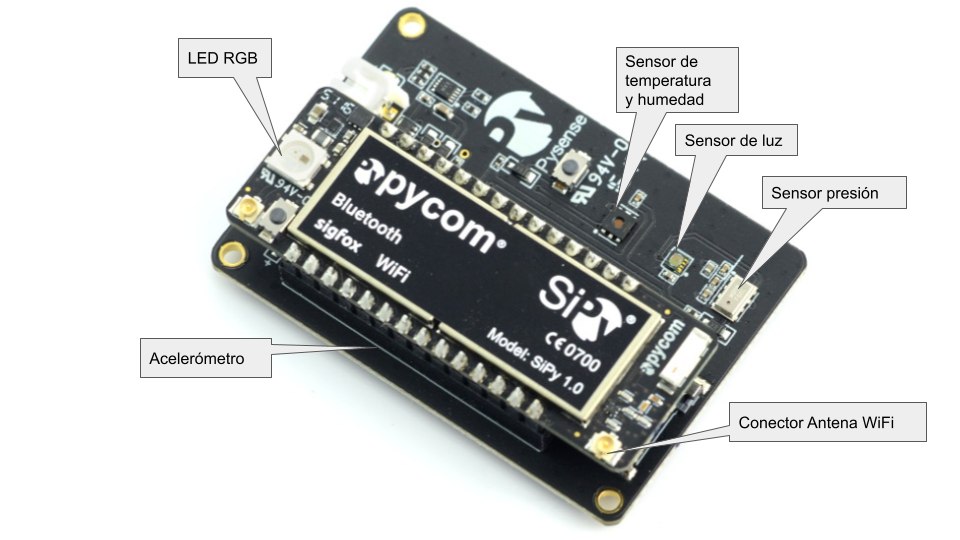

En esta segunda etapa del proyecto continuaremos utilizando los sensores de temperatura, humedad y luz, pero además incorporaremos el sensor de aceleración o acelerómetro. La medida de este nuevo sensor se expresa en la unidad conocida como *fuerza g* que equivale a la fuerza de gravedad (9.8 $m/s^2$). En un ambiente en reposo, nuestro dispositivo sólo experimenta la fuerza de la gravedad en uno o más de uno de sus ejes, por lo que el valor resultante nunca debiera ser mayor a $\pm$1g.

# Conexión al nodo de Internet de las Cosas 

Antes de iniciar a trabajar con el acelerómetro, debemos conectar el dispositivo a nuestra red WiFi. Debemos entonces instalar algunas liberrías específicas que luego utilizaremos para acceder a los diferentes sensores y controlar la luz LED RGB.

In [ ]:
%pip install -i https://test.pypi.org/simple/ pycom-client-library
%pip install zeroconf

Una vez instaladas las librerías, debemos importar la librería "pycom" que nos permitirá conectarnos a la dirección IP del dispositivo a través de WiFi. Esta dirección IP la obtenemos analizando los datos de arranque del dispositivo en otro programa. 

In [ ]:
from pycom import *

ipaddr = input("Ingrese la dirección IP del nodo:")
node = SimplePycomNode(ip=ipaddr, port=8000)

Cada dispositivo ofrece diferentes métodos (similar a lo que sucede con las cadenas) que nos permiten interactuar con sus sensores y actuadores. El método .help() nos describe las funcionalidades disponibles. En esta actividad utilzaremos sólo alguna de ellas relacionadas a la luz LED RGB, y a los sensores de temperatura, humedad y luz.

In [ ]:
node.help()

# Interacción con acelerómetro
A través del método *get('acceleration')* podemos obtener 3 valores que representan la medición de aceleración, cada valor corresponde a un eje. 

In [ ]:
print('[x, y, z]')
print(node.get('acceleration'))

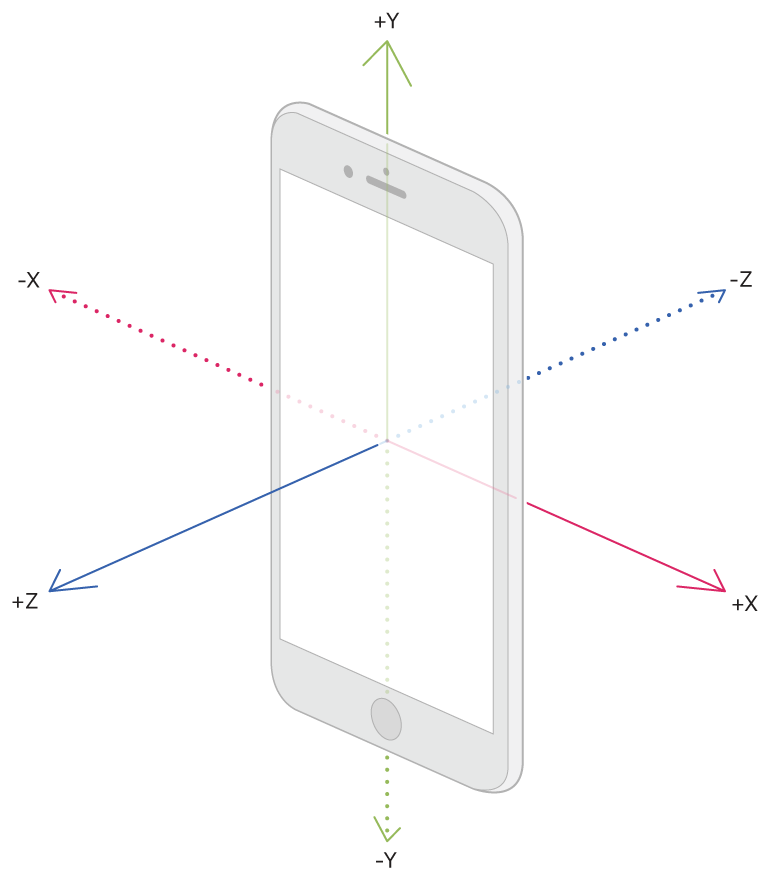

Si bien los datos se devuelven a través de una lista (que es una estrctura de datos que aún no hemos visto), podemos acceder a cada valor indexando esta lista con el uso de corchetes \[...\] e indicando la posición del elemento que queremos obtener. De esta forma podemos obtener el valor para cada eje.

In [ ]:
x = node.get('acceleration')[0]
y = node.get('acceleration')[1]
z = node.get('acceleration')[2]
print('x, y, z')
print(x, y, z)

Dado que nos interesa analizar sólo 3 casos donde nuestro dispositivo se encuentra posicionado sobre uno de los 3 ejes completamente, podemos redondear los valores obtenidos para que sólo uno de ellos sea $\pm$1, y los dos restantes sean 0.

In [ ]:
x = round(node.get('acceleration')[0])
y = round(node.get('acceleration')[1])
z = round(node.get('acceleration')[2])
print('x, y, z')
print(x, y, z)

Finalmente podemos construir una estrcutura que permita mostrarnos un mensaje con la posición de nuetsro dispositivo.

In [ ]:
x = round(node.get('acceleration')[0])
y = round(node.get('acceleration')[1])
z = round(node.get('acceleration')[2])
print('x:',x, 'y:', y, 'z:', z)
if x!=0:
    print("De costado u horizontal (Eje X - Color Rojo)")
elif y!=0:
    print("Parado o vertical (Eje Y - Color Verde)")
elif z!=0:
    print("Boca Arriba o acostado (Eje Z - Color Azul)")
else:
    print("Otro")

## Posición a través de la luz LED RGB

En vez imprimir un mensaje sobre este cuaderno, podemos pensar en indicar la posición encendiendo la luz LED RGB en uno de sus tres colores:
- <font color='#ff0000'>Rojo (255,0,0) 0xff0000 si está de costado u horizontal</font>
- <font color='#00ff00'>Verde (0,255,0) 0x00ff00 si está parado o vertical</font>
- <font color='#0000ff'>Azul (0,0,255) 0x0000ff  si está boca arriba o acostado</font>

In [ ]:
#Asignamos los valores del RGB a variables que representan el color
rojo = '0xff0000'
verde = '0x00ff00'
azul = '0x0000ff'
#Medimos la aceleracion
x = round(node.get('acceleration')[0])
y = round(node.get('acceleration')[1])
z = round(node.get('acceleration')[2])
if x!=0:
    node.post('color', color=rojo, duration=10)
elif y!=0:
    node.post('color', color=verde, duration=10)
elif z!=0:
    node.post('color', color=azul, duration=10)
else:
    print("Otro")

## Sensores de temperatura, humedad y luz

Recordemos cómo utilizar los sensores de temperatura, humedad y luz para realizar mediciones.

In [ ]:
print('Temperatura (C):',node.get('temperature'))
print('Humedad Relativa (%):',node.get('humidity'))
print('Luz (lux):',node.get('lux'))

# Proyecto IoT: Monitor Ambiental
En la primera etapa expresamos cada medición de los sensores a través de uno de los colored del led RGB.

## Monitor de Temperatura: Intensidad del Color Rojo (R)

In [ ]:
#Rango temperatura entre -10 y 85
temp_max = 85.
temp_min = -10.
temp_range = temp_max - temp_min
temp_val = node.get('temperature')
print('Temperatura (C):',temp_val)
temp_col = (temp_val+temp_min)/temp_range*256
rgb_str = '%#04x%02x%02x' % (int(temp_col), 0, 0)
print('Color Rojo: %s (%d)' % (rgb_str, int(temp_col)))
rgb_int = int(rgb_str,16)
node.post('color', color=rgb_int, duration=10)

## Monitor de Humedad: Intensidad del Color Verde (G) 

In [ ]:
#Rango humedad relativa entre 0 y 90
hum_max = 90.
hum_min = 0.
hum_range = hum_max - hum_min
hum_val = node.get('humidity')
print('Humedad Relativa (%):',hum_val)
hum_col = (hum_val+hum_min)/hum_range*256
rgb_str = '%#04x%02x%02x' % (0, int(hum_col), 0)
print('Color Verde: %s (%d)' % (rgb_str, int(hum_col)))
rgb_int = int(rgb_str,16)
node.post('color', color=rgb_int, duration=10)

## Monitor de Luz: Intensidad del Color Azul (B)

In [ ]:
#Rango luz relativa entre 0.01 y 64K
lux_max = 64e3
lux_min = 0.01
lux_range = lux_max - lux_min
lux_val = node.get('lux')
print('Iluminancia:',lux_val)
lux_col = (lux_val+lux_min)/lux_range*256
rgb_str = '%#04x%02x%02x' % (0, 0, int(lux_col))
print('Color Azul: %s (%d)' % (rgb_str, int(lux_col)))
rgb_int = int(rgb_str,16)
node.post('color', color=rgb_int, duration=10)

# Desafío: Monitor Ambiental Integrado (Etapa 2)
En función de la posición podemos medir una de las variables ambientales (temperatura, humedad o luz) e indicar su valor a través de la intensidad de un color:
- En la posición horizonta medimos la temperatura y la mostramos con la intensidad del color rojo
- En la posición vertical medimos la humedad y la mostramos con la intensidad del color verde
- En la posición acostado medimos la luz y la mostramos con la intensidad del color azul



In [ ]:
x = abs(round(node.get('acceleration')[0]))
y = abs(round(node.get('acceleration')[1]))
z = abs(round(node.get('acceleration')[2]))

if(x!=0): #Horizontal - Rojo - Temperatura
    temp_max = 85.
    temp_min = -10.
    temp_range = temp_max - temp_min
    temp_val = node.get('temperature')
    temp_col = (temp_val+temp_min)/temp_range*256    
    rgb_str = '%#04x%02x%02x' % (int(temp_col), 0, 0)
elif(y!=0):#Vertical - Verde - Humedad
    hum_max = 90.
    hum_min = 0.
    hum_range = hum_max - hum_min
    hum_val = node.get('humidity')
    hum_col = (hum_val+hum_min)/hum_range*256
    rgb_str = '%#04x%02x%02x' % (0, int(hum_col), 0)
elif(z!=0):#Acostado - Azul - Luz
    lux_max = 64e3
    lux_min = 0.01
    lux_range = lux_max - lux_min
    lux_val = node.get('lux')
    lux_col = (lux_val+lux_min)/lux_range*256
    rgb_str = '%#04x%02x%02x' % (0, 0, int(lux_col))
else:
    rgb_str = '0x000000'#Apagado
    
print(rgb_str)
rgb_int = int(rgb_str,16)
node.post('color', color=rgb_int, duration=10)

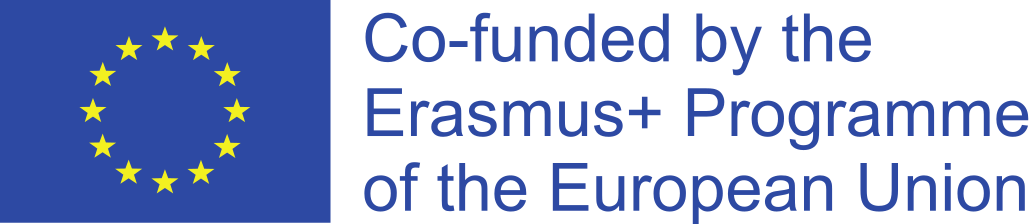